In [2]:
! pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 487.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/9.9 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 573.4 kB/s eta 0:00:18
   ---------------------------------------- 0.1/9.9 MB 573.4 kB/s eta 0:00:18
   ---------------------------------------- 0.1/9.9 MB 479.3 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.9 MB 544.7 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.9 MB 686.8 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.9 MB 684.7 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.9 MB 684.7 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.9 MB 545.8 kB/s eta 0:00:18
   - --------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


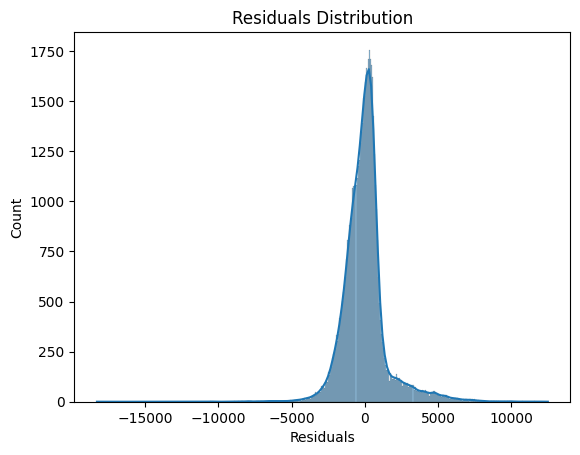

In [3]:
#q1
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


In [4]:
#q2
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MSE: 2328790.80, MAE: 994.33, RMSE: 1526.04


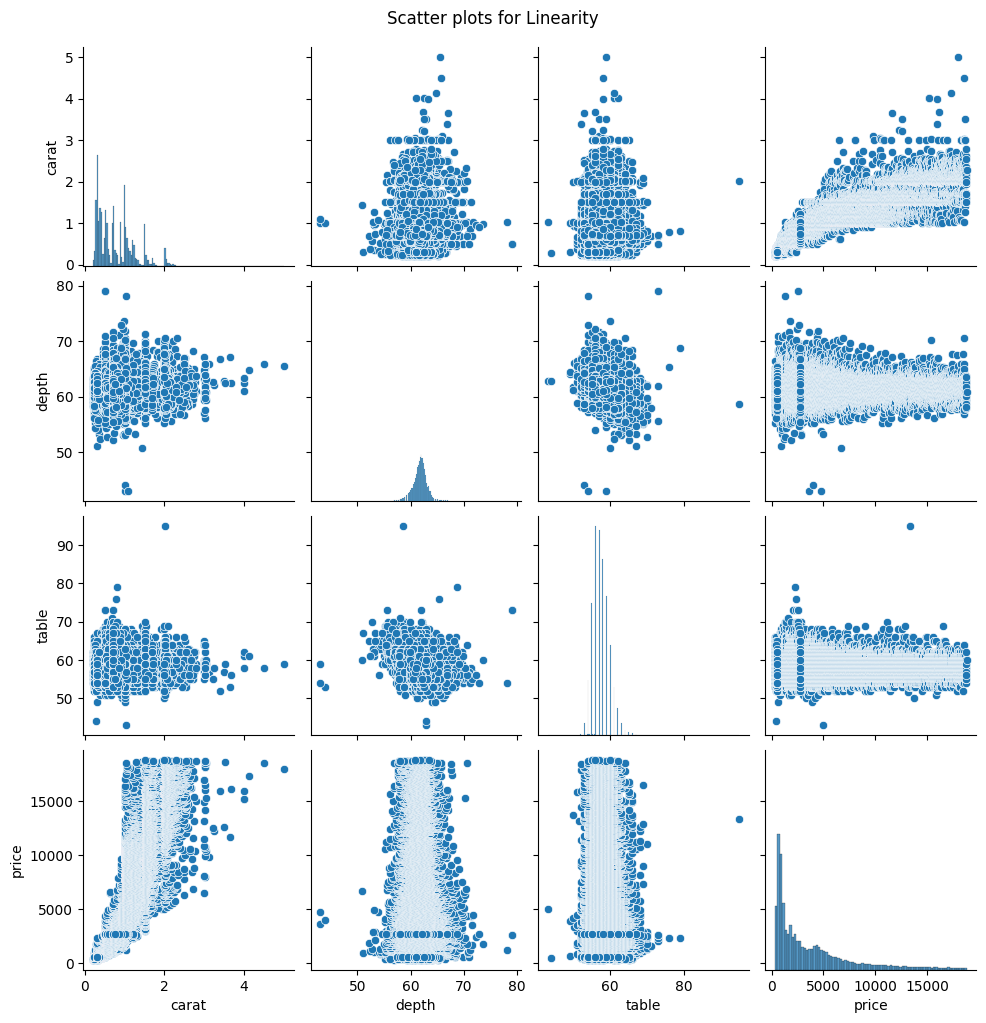

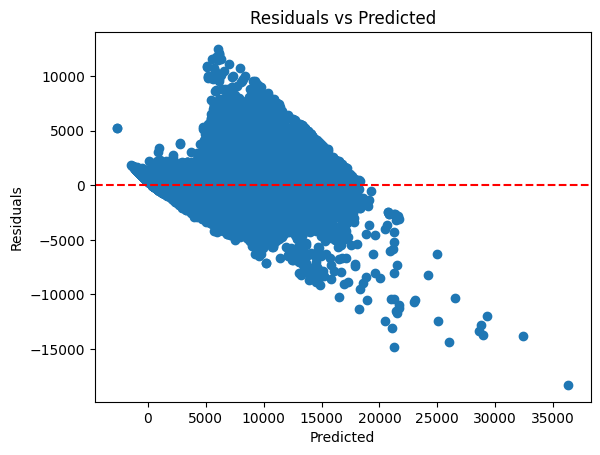

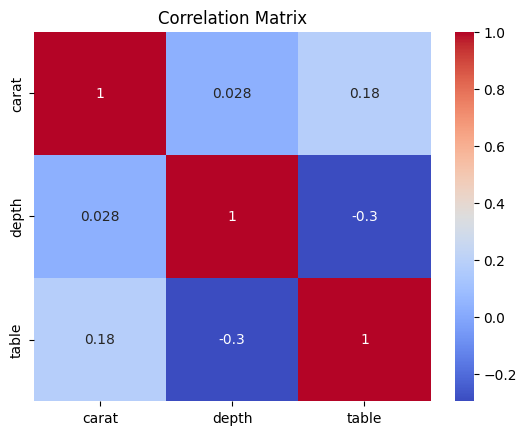

In [5]:
#q3
import seaborn as sns
import matplotlib.pyplot as plt

# Linearity
sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.suptitle("Scatter plots for Linearity", y=1.02)
plt.show()

# Homoscedasticity
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity
sns.heatmap(df[['carat', 'depth', 'table']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
#q4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

X = df[['carat', 'depth', 'table']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
print("Linear Regression R²:", pipeline.score(X_test, y_test))


Linear Regression R²: 0.8553747813960849


In [7]:
#q5
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['carat']], y_train)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X_test[['carat']], y_test))


Coefficient: 7772.025381201875
Intercept: -2262.073081987116
R² Score: 0.851098391572491


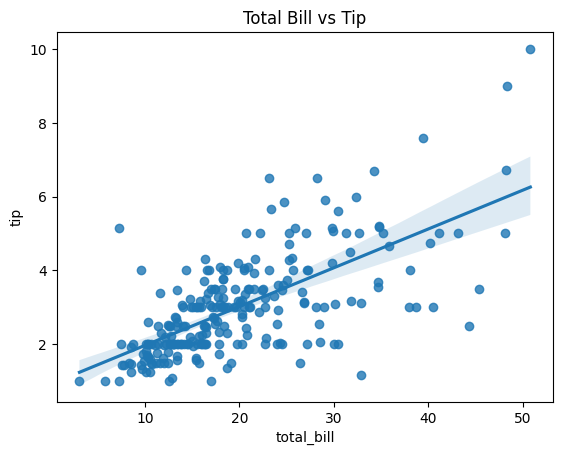

In [8]:
#q6
tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

sns.regplot(x="total_bill", y="tip", data=tips)
plt.title("Total Bill vs Tip")
plt.show()


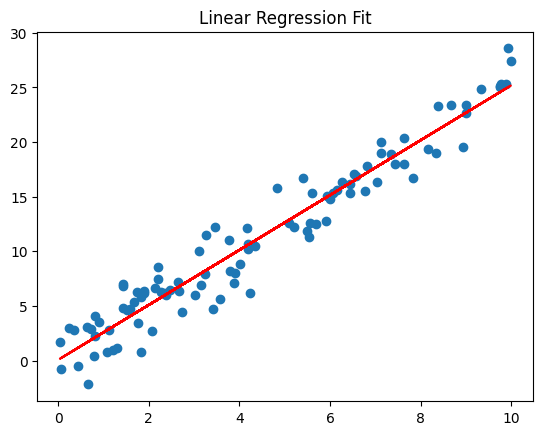

In [9]:
#q7
import numpy as np
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Linear Regression Fit")
plt.show()


In [10]:
#q8
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)


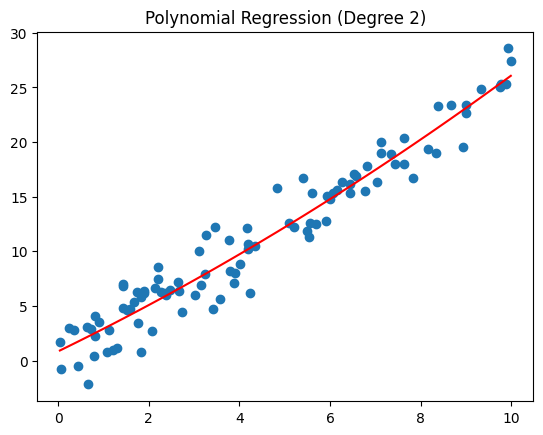

In [11]:
#q9
from sklearn.preprocessing import PolynomialFeatures

X_poly = PolynomialFeatures(degree=2).fit_transform(X)
model = LinearRegression().fit(X_poly, y)

plt.scatter(X, y)
plt.plot(np.sort(X.squeeze()), model.predict(PolynomialFeatures(2).fit_transform(np.sort(X, axis=0))), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.show()


In [12]:
#q10
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 1.5

model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient: 3.003030229618495
Intercept: -0.06684206810120408


In [13]:
#q11
degrees = [1, 2, 3, 4]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {deg} R²: {model.score(X_poly, y):.4f}")


Degree 1 R²: 0.9686
Degree 2 R²: 0.9689
Degree 3 R²: 0.9690
Degree 4 R²: 0.9700


In [14]:
#q12
X = df[['carat', 'depth']]
y = df['price']
model = LinearRegression().fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))


Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826012404
R² Score: 0.8506754571636563


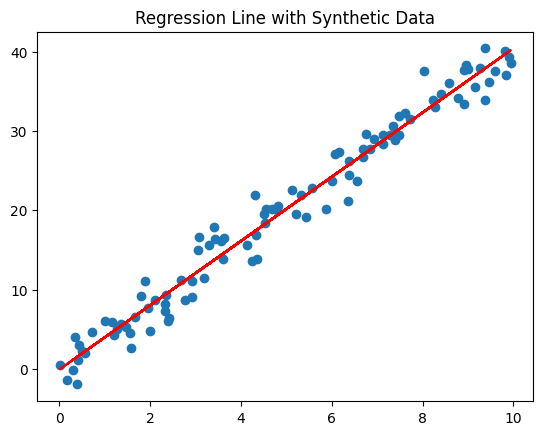

In [15]:
#q13
X = np.random.rand(100, 1) * 10
y = 4 * X.squeeze() + np.random.randn(100) * 2

model = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title("Regression Line with Synthetic Data")
plt.show()


In [16]:
# Q14
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  feature          VIF
0   const  3539.323665
1   carat     1.042039
2   depth     1.104275
3   table     1.141032


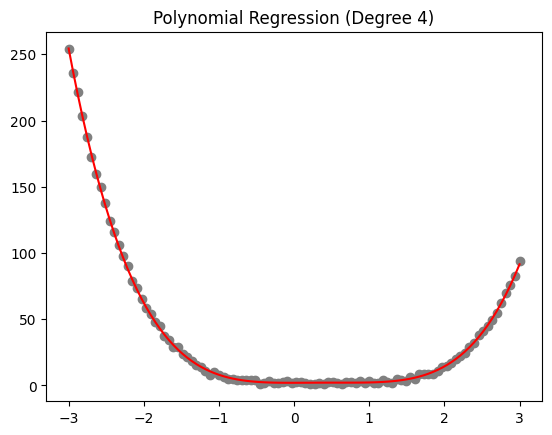

In [17]:
#q15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2*X**4 - 3*X**3 + X**2 + 2 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

plt.scatter(X, y, color='gray')
plt.plot(X, model.predict(X_poly), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [18]:
#q16
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['carat', 'depth', 'table']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
print("R² Score:", pipeline.score(X_test, y_test))


R² Score: 0.8469686986745488


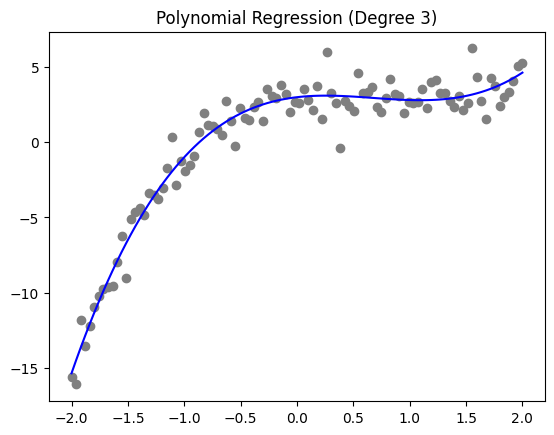

In [19]:
#q17
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = 1*X**3 - 2*X**2 + X + 3 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

plt.scatter(X, y, color='gray')
plt.plot(X, model.predict(X_poly), color='blue')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [20]:
#q18
X = np.random.rand(100, 5)
y = X @ np.array([1.5, -2, 0.5, 3, -1]) + np.random.randn(100)

model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R² Score: 0.596946496239659
Coefficients: [ 1.61219213 -1.82309733  0.97343396  2.82964924 -1.40266106]


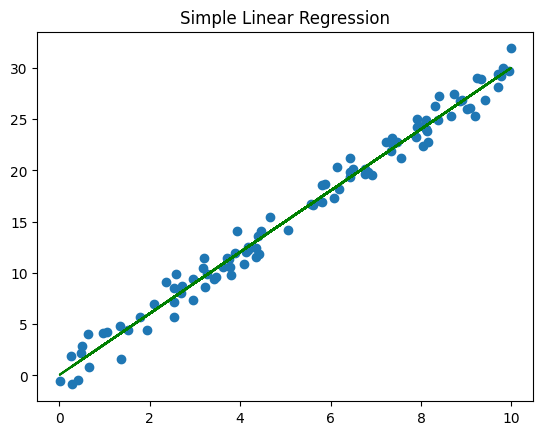

In [21]:
#q19
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100)

model = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='green')
plt.title("Simple Linear Regression")
plt.show()


In [22]:
#q20
X = np.random.rand(100, 3)
y = X @ np.array([1.2, -3.4, 2.1]) + np.random.randn(100)

model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R² Score: 0.6274007706572029
Coefficients: [ 1.16342387 -2.77376263  2.58194821]


In [23]:
#q22
tips = sns.load_dataset("tips")
tips_encoded = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

model = LinearRegression().fit(X, y)
print("R² Score:", model.score(X, y))


R² Score: 0.47007812322060794


In [24]:
#q23
from sklearn.linear_model import Ridge

X = np.random.rand(100, 5)
y = X @ np.array([2, -1, 0.5, 1.5, -0.8]) + np.random.randn(100)

lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)

print("Linear Coefficients:", lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Linear R²:", lr.score(X, y))
print("Ridge R²:", ridge.score(X, y))


Linear Coefficients: [ 1.69075686 -1.25309348  0.31165022  1.72780051 -1.06569763]
Ridge Coefficients: [ 1.47474074 -1.11981074  0.23225528  1.45733597 -0.93032631]
Linear R²: 0.3687602649090398
Ridge R²: 0.36234724272129126


In [25]:
#q24
from sklearn.model_selection import cross_val_score

X = np.random.rand(100, 3)
y = X @ np.array([1.5, -2.5, 3.0]) + np.random.randn(100)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validated R² Scores:", scores)
print("Mean R²:", scores.mean())


Cross-Validated R² Scores: [0.3163474  0.51299949 0.57589764 0.63423687 0.41888358]
Mean R²: 0.49167299742494297


In [26]:
#q25
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = X**4 - 3*X**2 + 2 + np.random.randn(100, 1)

for deg in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {deg} R²: {model.score(X_poly, y):.4f}")


Degree 1 R²: 0.0006
Degree 2 R²: 0.1345
Degree 3 R²: 0.1354
Degree 4 R²: 0.6528
